In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, recall_score, precision_score, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
df['target'].unique()

array([0, 1], dtype=int64)

In [5]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [8]:
df.drop_duplicates(inplace=True)

In [10]:
X = df.drop(columns=["target"])
y = df['target']

<Axes: xlabel='age', ylabel='Count'>

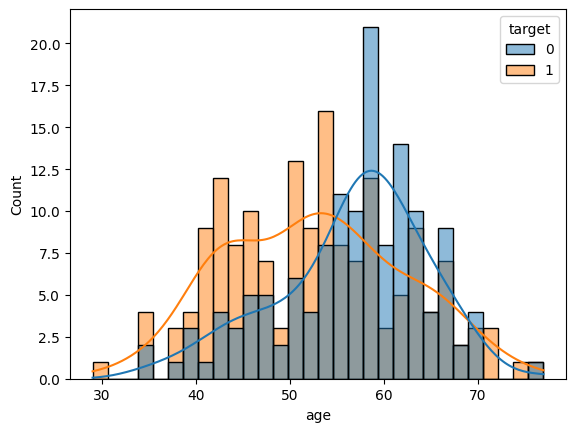

In [13]:
sns.histplot(data=df,x="age",hue="target",kde=True,bins=30)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42,test_size=0.3)

In [14]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_scaled,y_train)

DecisionTreeClassifier(random_state=42)

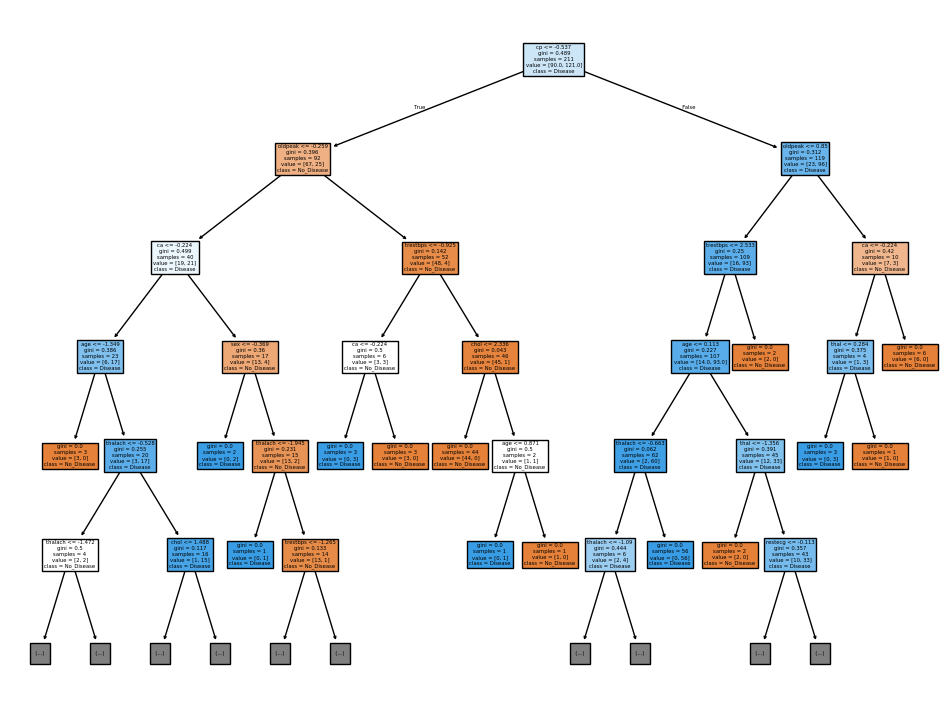

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,9))
plot_tree(dt,feature_names=X.columns,max_depth=5,class_names=["No_Disease","Disease"],filled=True)
plt.show()

In [23]:
dt_predict = dt.predict(X_test_scaled)

In [25]:
cm = confusion_matrix(y_test, dt_predict)
precision = precision_score(y_test, dt_predict)
recall = recall_score(y_test, dt_predict)
roc_auc = roc_auc_score(y_test, dt_predict)
print("Confusion Matrix (Threshold=0.5):")
print(cm)
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"ROC-AUC: {roc_auc:.3f}")

Confusion Matrix (Threshold=0.5):
[[35 13]
 [10 33]]
Precision: 0.717
Recall: 0.767
ROC-AUC: 0.748


In [27]:
train_acc = dt.score(X_train_scaled,y_train)
test_acc = dt.score(X_test_scaled,y_test)

In [28]:
print(f"Train Accuracy: {train_acc}")
print(f"Test Accuracy: {test_acc}")

Train Accuracy: 1.0
Test Accuracy: 0.7472527472527473


NOW WE WILL CONROL THE TREE DEPTH TO CURE OVERFITTING

In [42]:
dt1 = DecisionTreeClassifier(max_depth=3,min_samples_split=10,min_samples_leaf=5,random_state=42)
dt1.fit(X_train_scaled,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, min_samples_split=10,
                       random_state=42)

In [47]:
train_score = dt1.score(X_train_scaled,y_train)
test_score = dt1.score(X_test_scaled,y_test)

print(f"Train Accuracy: {train_score}")
print(f"Test Accuracy: {test_score}")

Train Accuracy: 0.8483412322274881
Test Accuracy: 0.7692307692307693


In [49]:
pred = dt1.predict(X_test_scaled)

In [45]:
rfc = RandomForestClassifier(n_estimators=100,max_depth=5,random_state=42)
rfc.fit(X_train_scaled,y_train)

RandomForestClassifier(max_depth=5, random_state=42)

In [48]:
train_rfc = rfc.score(X_train_scaled,y_train)
test_rfc = rfc.score(X_test_scaled,y_test)
print(f"Train Accuracy: {train_rfc}")
print(f"Test Accuracy: {test_rfc}")

Train Accuracy: 0.9715639810426541
Test Accuracy: 0.8351648351648352


In [51]:
rfc_pred = rfc.predict(X_test_scaled)

In [54]:
print("decision_tree",accuracy_score(y_test,pred))
print("random_forest",accuracy_score(y_test,rfc_pred))

decision_tree 0.7692307692307693
random_forest 0.8351648351648352


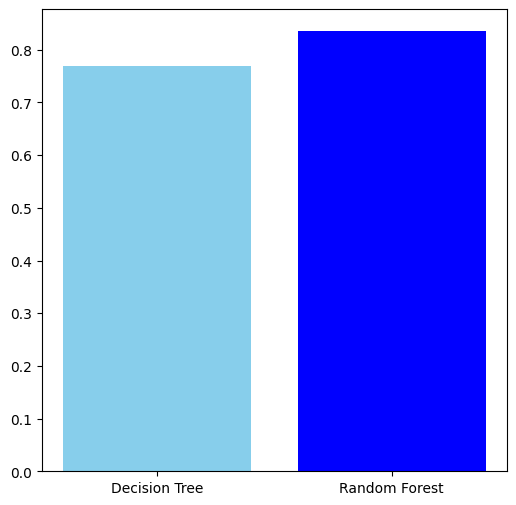

In [59]:
dt_accuracy = accuracy_score(y_test, pred)
rf_accuracy = accuracy_score(y_test, rfc_pred)

models = ['Decision Tree', 'Random Forest']
accuracies = [dt_accuracy, rf_accuracy]

plt.figure(figsize=(6,6))
plt.bar(models,accuracies,color=['skyblue','blue'])
plt.show()

In [61]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(rfc,X,y,cv=5)
print(score.mean())

0.8408743169398907
